## 1. Setup

### 1.1 Environment/Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

### 1.2 Read in data

In [2]:
dbase = '../assets/Preprocessed Data.xlsx'
data = pd.read_excel(dbase, sheet='Sheet1')

data.head()

,Author,Description,Long,Performance,Quality,Submission Date,Rating Date,One Year Date,Ticker,FDS Ticker,...,logPE,logPsales,logPFCF,logMKT,logEV,logROIC,MKT_category,Sentiment_polarity,Sentiment_subjectivity,Outperformed
1,Den1200,\nI recommend the purchase of BRK (and shortin...,True,3.9,2.6,2016-08-23,2016-09-06,2017-09-06,BRK.A,BRK.B,...,2.639003,0.489930,3.017299,12.813473,12.896157,1.999010,Large Cap,0.120324,0.429861,1
1,piggybanker,\n\nWe believe that the stock of 1-800-Flowers...,True,4.3,4.0,2013-10-16,2013-10-30,2014-10-30,FLWS,FLWS,...,3.228965,-0.793357,4.770579,4.949525,5.995618,2.256795,Small Cap,0.131239,0.502589,1
2,shoon1022,"\n \nAt $2.80, FLWS has an enterprise value of...",True,3.4,3.8,2011-02-20,2011-03-06,2012-03-05,FLWS,FLWS,...,0.000000,-1.316094,0.000000,4.330223,5.381191,0.000000,Small Cap,0.103768,0.380808,0
3,xds68,\n \n\n\n \n8/23/2017\n \nRecommending Seaboar...,True,0.0,0.0,2016-08-23,2016-09-06,2017-09-06,SEB,SEB,...,2.635309,-0.474458,2.675116,8.234805,8.042525,2.034737,Medium Cap,0.063402,0.422381,1
3,u0422811,\nThis pitch is pretty simple. Unfortunately...,False,5.2,4.9,2016-02-15,2016-02-29,2017-02-28,1PG,1PG-AU,...,0.000000,0.000000,0.000000,5.889505,5.603921,0.000000,Small Cap,0.121530,0.490904,0


### 1.3 Separate into long/short datasets

In [3]:
data_long = data[data['Long'] == True]
data_short = data[data['Long'] == False]

#limit to priced data
data_long = data_long[data_long['One Year Date']< datetime.now()]
data_short = data_short[data_short['One Year Date']< datetime.now()]

data_long = data_long[data_long['Outperformance'].notnull()]
data_short = data_short[data_short['Outperformance'].notnull()]

## 2. Data Vizualization/Exploration

In [4]:
data_long.describe()

,Performance,Quality,Submission Price,Rating Price,One Year Price,Submission Index Price,Rating Index Price,One Year Index Price,PE,Psales,...,Desc length,logPE,logPsales,logPFCF,logMKT,logEV,logROIC,Sentiment_polarity,Sentiment_subjectivity,Outperformed
count,4475.000000,4475.000000,4.475000e+03,4.475000e+03,4.475000e+03,4475.000000,4475.000000,4475.000000,4.475000e+03,4475.000000,...,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,2.492626,3.587084,8.750014e+03,8.341205e+03,1.673960e+03,1485.558278,1488.749904,1572.609188,3.107735e+13,23.554201,...,13004.614302,1.647125,0.156042,1.415442,6.607450,6.552743,1.179221,0.087382,0.428907,0.427263
std,2.516690,2.218644,4.795910e+05,4.516447e+05,4.320835e+04,357.711771,358.082090,405.056595,2.078933e+15,913.626976,...,7514.571110,1.664374,1.171867,1.564895,2.297966,2.866885,1.329904,0.039230,0.043330,0.494736
min,0.000000,0.000000,0.000000e+00,1.234567e-04,1.234567e-04,676.530000,676.530000,682.550000,0.000000e+00,0.000000,...,10.000000,-5.283807,-11.075075,-3.712416,-3.997799,-4.165175,-4.501694,-0.166667,0.000000,0.000000
25%,0.000000,0.000000,6.515000e+00,6.670000e+00,5.840000e+00,1254.022500,1254.045000,1265.375000,0.000000e+00,0.227855,...,7317.500000,0.000000,-0.383592,0.000000,5.039896,4.988783,0.000000,0.063482,0.402889,0.000000
50%,2.900000,4.500000,1.494000e+01,1.500000e+01,1.476000e+01,1415.950000,1416.180000,1494.250000,7.748459e+00,0.848569,...,11182.000000,2.047494,0.000000,1.136173,6.452751,6.735707,0.898108,0.087130,0.430046,0.000000
75%,5.000000,5.300000,3.118500e+01,3.131000e+01,3.220333e+01,1807.230000,1828.460000,1992.885000,1.761944e+01,1.987228,...,16973.000000,2.869003,0.686741,2.677606,8.072930,8.426027,2.281044,0.111894,0.455483,1.000000
max,7.200000,7.600000,3.187500e+07,3.000000e+07,2.375000e+06,2130.820000,2130.820000,2213.350000,1.390712e+17,59731.676075,...,32755.000000,39.473762,10.997618,9.325826,19.196035,18.851058,6.672709,0.500000,0.700000,1.000000


### 2.1 Quick summary

In [5]:
print 'Percentage of outperformers in Long group is: {0:.2f}%'.format(float(data_long['Outperformed'].sum())/len(data_long)*100)
print len(data_long)
print "Long write-ups average outperformance: {0:.2f}%".format(data_long['Outperformance'].mean()*100)
print 'Number of Long write-ups is: {}'.format(len(data_long))
print
print 'Percentage of outperformers in Short group is: {0:.2f}%'.format(float(data_short['Outperformed'].sum())/len(data_short)*100)
print data_short['Outperformed'].sum()
print "Short write-ups average outperformance: {0:.2f}%".format(data_short['Outperformance'].mean()*100)
print 'Number of Short write-ups is: {}'.format(len(data_short))

Percentage of outperformers in Long group is: 42.73%
4475
Long write-ups average outperformance: 0.81%
Number of Long write-ups is: 4475

Percentage of outperformers in Short group is: 34.69%
289
Short write-ups average outperformance: -11.03%
Number of Short write-ups is: 833


### 2.2 Full feature pairplot

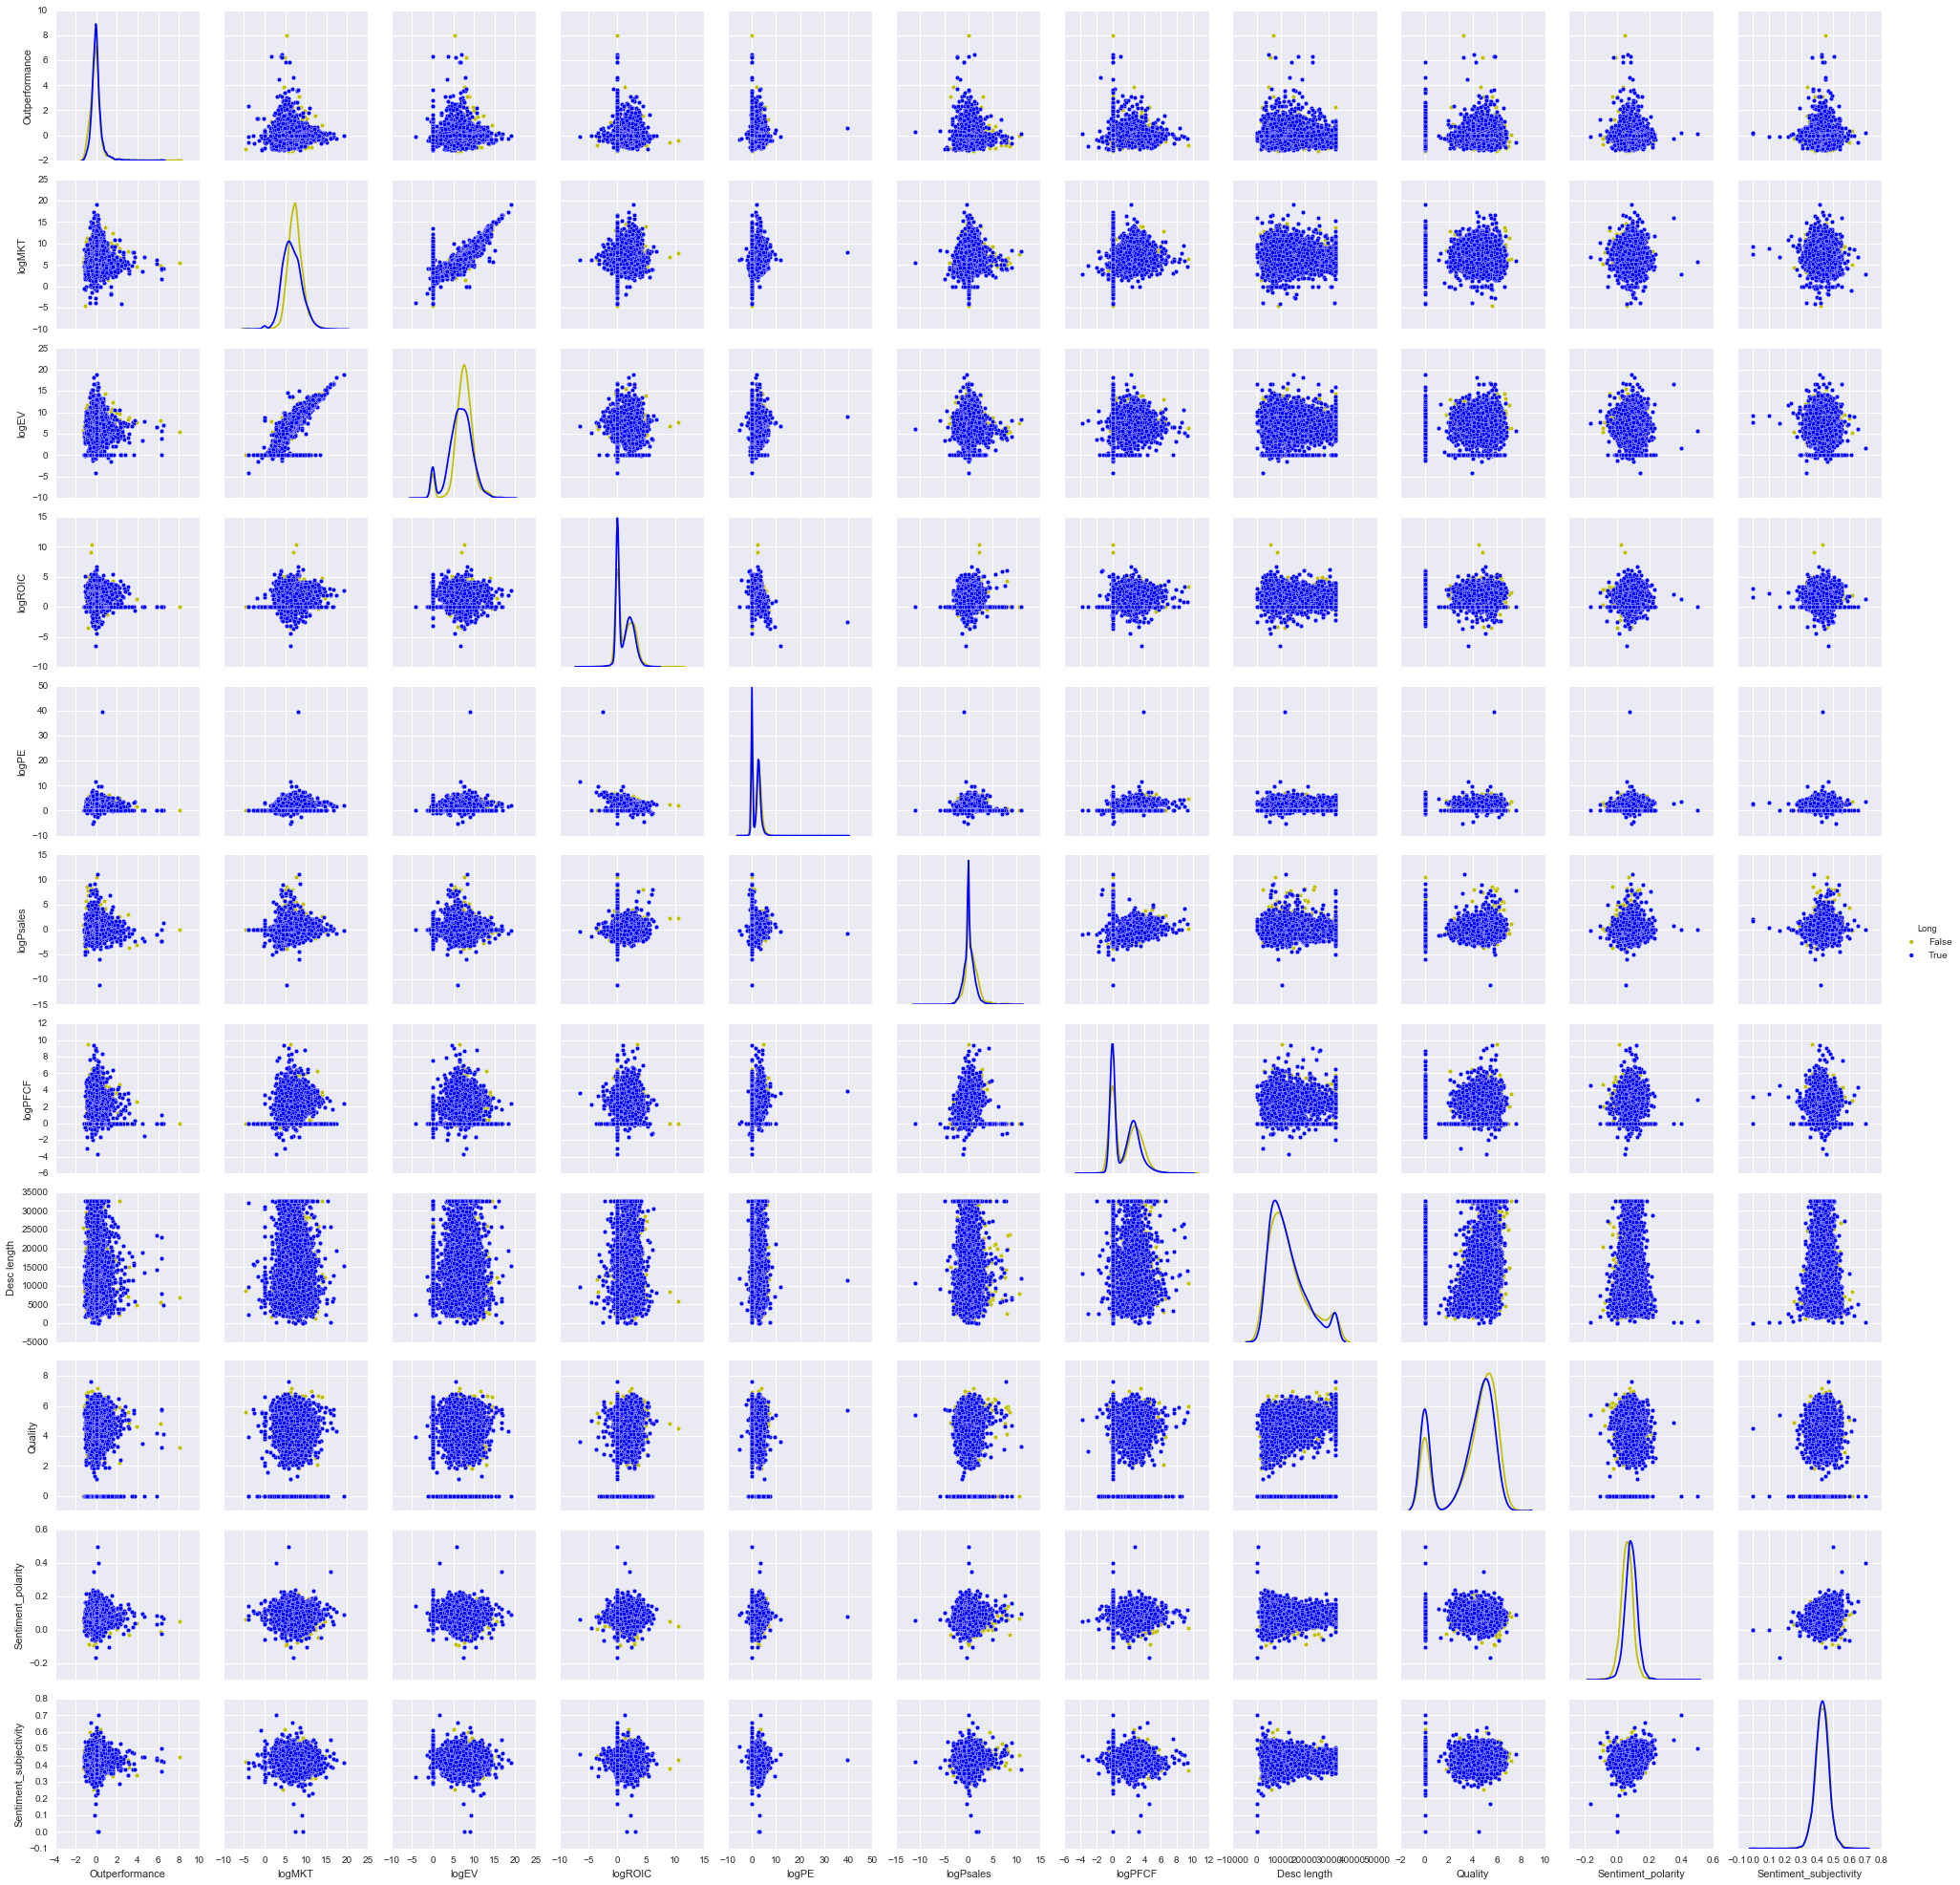

In [6]:
sns.pairplot(data, 
             vars=["Outperformance",'logMKT','logEV','logROIC','logPE','logPsales','logPFCF','Desc length','Quality','Sentiment_polarity','Sentiment_subjectivity'], 
             hue="Long",
             dropna=True,
             palette={True:'b',False:'y'},
             diag_kind="kde")

### 2.3 Performance visualization

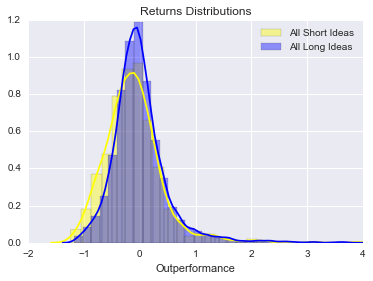

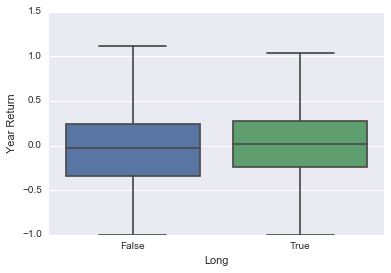

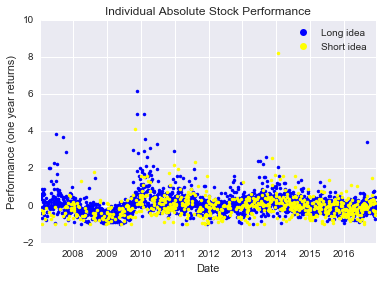

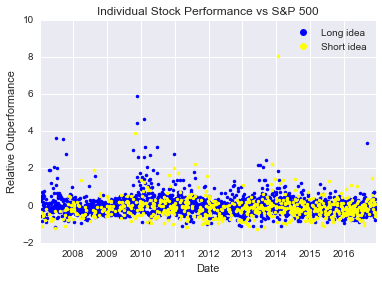

In [7]:
sns.plt.title('Returns Distributions')
sns.distplot(data_short['Outperformance'],color='yellow',label='All Short Ideas')
sns.distplot(data_long['Outperformance'],color='blue',label='All Long Ideas')
sns.plt.xlim(-2,4)
sns.plt.legend()

plt.figure()
sns.boxplot(x = 'Long', y='Year Return',data = data,showfliers=False)
plt.xlabel

timed_short = data_short[['One Year Date','Year Return','Year Index Return','Outperformance']].groupby('One Year Date').agg([np.mean,np.std,len]).reset_index()
timed_long = data_long[['One Year Date','Year Return','Year Index Return','Outperformance']].groupby('One Year Date').agg([np.mean,np.std,len]).reset_index()

date = timed_long['One Year Date']
short_date = timed_short['One Year Date']

performance_mean = np.array(timed_long['Year Return']['mean'])
index_performance_mean = np.array(timed_long['Year Index Return']['mean'])
short_performance_mean = timed_short['Year Return']['mean']
y_mean_short = np.array(timed_long['Year Return'])

plt.figure()
plt.title('Individual Absolute Stock Performance')
plt.plot(date, performance_mean, '.', color = 'blue')
plt.plot(short_date, short_performance_mean, '.', color = 'yellow')
plt.xlabel('Date')
plt.ylabel('Performance (one year returns)')
plt.legend(['Long idea', 'Short idea'],loc='best',markerscale = 2)


long_outperformance_mean = np.array(timed_long['Outperformance']['mean'])
short_outperformance_mean = np.array(timed_short['Outperformance']['mean'])

plt.figure()
plt.title('Individual Stock Performance vs S&P 500')
plt.plot(date, long_outperformance_mean, '.', color = 'blue')
plt.plot(short_date, short_outperformance_mean, '.', color = 'yellow')
plt.xlabel('Date')
plt.ylabel('Relative Outperformance')
plt.legend(['Long idea', 'Short idea'],loc='best',markerscale = 2)

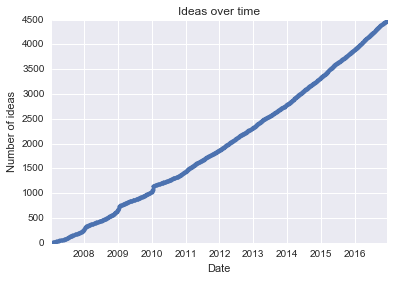

In [8]:
plt.figure()
plt.title('Ideas over time')
plt.plot(date, timed_long['Year Return']['len'].cumsum(), '.')
plt.xlabel('Date')
plt.ylabel('Number of ideas')

### 2.4 Short vs. Long Write-up Sentiment

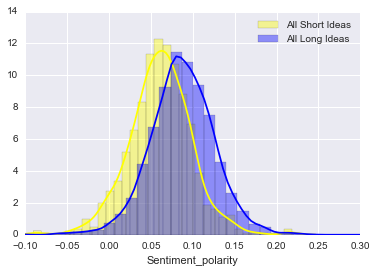

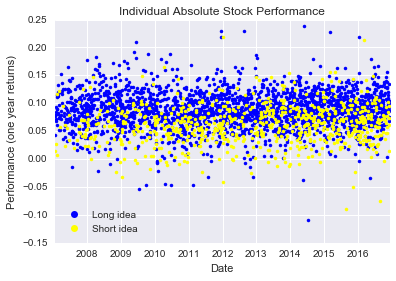

In [9]:
sns.distplot(data_short['Sentiment_polarity'],color='yellow',label='All Short Ideas')
sns.distplot(data_long['Sentiment_polarity'],color='blue',label='All Long Ideas')
sns.plt.xlim(-0.1,0.3)
sns.plt.legend()

timed_short = data_short[['One Year Date','Sentiment_polarity']].groupby('One Year Date').agg([np.mean,np.std,len]).reset_index()
timed_long = data_long[['One Year Date','Sentiment_polarity']].groupby('One Year Date').agg([np.mean,np.std,len]).reset_index()

plt.figure()
plt.title('Individual Absolute Stock Performance')
plt.plot(date, timed_long['Sentiment_polarity']['mean'], '.', color = 'blue')
plt.plot(short_date, timed_short['Sentiment_polarity']['mean'], '.', color = 'yellow')
plt.xlabel('Date')
plt.ylabel('Performance (one year returns)')
plt.legend(['Long idea', 'Short idea'],loc='best',markerscale = 2)

### 2.5 Short vs. Long Write-up Objectivity

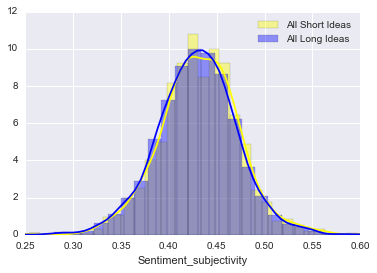

In [10]:
sns.distplot(data_short['Sentiment_subjectivity'],color='yellow',label='All Short Ideas')
sns.distplot(data_long['Sentiment_subjectivity'],color='blue',label='All Long Ideas')
sns.plt.xlim(0.25,0.6)
sns.plt.legend()

### 2.4 Write-up length vs. Outperformance

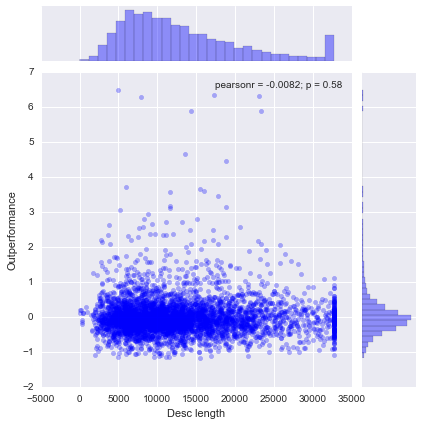

In [11]:
sns.jointplot(data_long['Desc length'],data_long['Outperformance'], color = 'blue',alpha = 0.3)

### 2.5 logPFCF vs. Outperformance

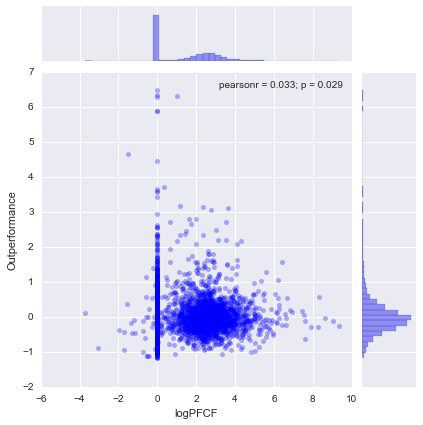

In [12]:
sns.jointplot(data_long['logPFCF'],data_long['Outperformance'], color = 'blue',alpha = 0.3)

### 2.5 Industry

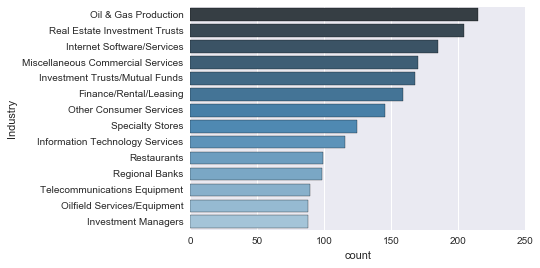

In [13]:
sns.countplot(y="Industry",data=data,order=data['Industry'].value_counts().iloc[:14].index,palette='Blues_d')

### 2.7 Market cap

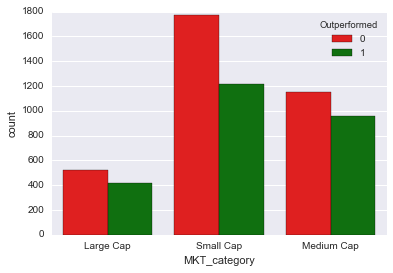

In [14]:
sns.countplot(x="MKT_category",data=data,hue='Outperformed',palette={0:"r", 1:"g"})

### 2.8 Region

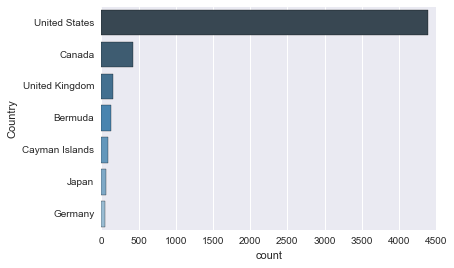

In [15]:
sns.countplot(y="Country",data=data, order=data['Country'].value_counts().iloc[:7].index,palette='Blues_d')

### 2.9 Value over time

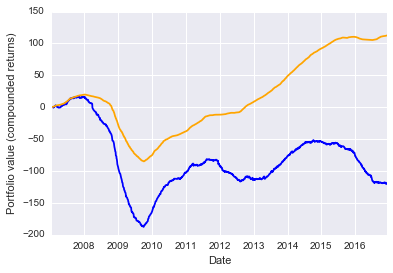

In [16]:
cum_return = np.log(1+performance_mean).cumsum()
cum_index_return = np.log(1+index_performance_mean).cumsum()
plt.figure()
plt.plot(date, cum_return, color='blue')
plt.plot(date, cum_index_return, color ='orange')
plt.xlabel('Date')
plt.ylabel('Portfolio value (compounded returns)')